<a href="https://colab.research.google.com/github/syncsapro/imc2023-gibble/blob/main/labAssignment5_gibble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import scipy.signal as sg

#import audio files
!git clone https://github.com/jcdevaney/imc2023.git

Cloning into 'imc2023'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 130 (delta 28), reused 18 (delta 18), pack-reused 96
Receiving objects: 100% (130/130), 16.27 MiB | 12.88 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [2]:
def plotTimeFreq(sig,sr,title,winSize,specType,fig):

    # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr
    
    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion
    
    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Create a new figure (using the figure number passed in as an argument)
    plt.figure(fig)
    
    # Create the first subplot
    plt.subplot(2,1,1)
    
    # Plot the time-domain representation of the inputted audio signal  
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Create the second subplot
    plt.subplot(2,1,2)
    
    # Plot the frequency-domain representatio of the inputted audio signal
    spec = librosa.amplitude_to_db(np.abs(librosa.stft(sig,n_fft=winSize)), ref=np.max)
    librosa.display.specshow(spec, y_axis=specType)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show

In [6]:
def filterSignal(sig,sr,freq,filtType,order,winSize,specType,fig):

    if filtType == "low" or filtType == "high":
        filterFreq = freq / (sr / 2)
    elif filtType == "bandpass" or filtType == "bandstop":
        filterFreq = [freq[0] / (sr / 2), freq[1] / (sr / 2)]

    b, a = sg.butter(order, filterFreq, filtType)


    sig_fil1a = sg.filtfilt(b, a, sig)

    plotTimeFreq(sig_fil1a,sr,filtType,winSize,specType,fig)

    return sig_fil1a       



In [24]:
def allFilters(sig,sr,freq,width,order,winSize,specType):

    lowpass = filterSignal(sig,sr,freq,'low',order,winSize,specType,'1')

    highpass = filterSignal(sig,sr,freq,'high',order,winSize,specType,'2')

    bandpass = filterSignal(sig,sr,[400,800],'bandpass',order,winSize,specType,'3')

    bandstop = filterSignal(sig,sr,[400,800],'bandstop',order,winSize,specType,'4')

    return lowpass

    return highpass

    return bandpass

    return bandstop


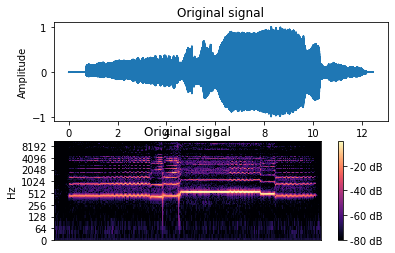

In [13]:
sig , sr = librosa.load('imc2023/audioFiles/avm.wav')
winSize = 1024
specType = 'log'
fig = 1

plotTimeFreq(sig,sr,'Original signal',winSize,specType,fig)

IPython.display.Audio(data=sig, rate=sr)

ValueError: ignored

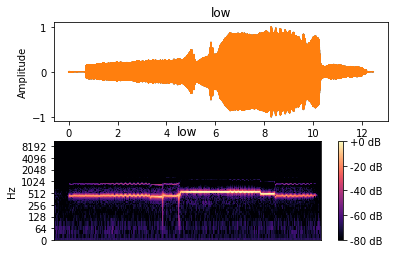

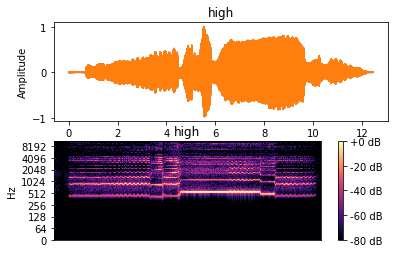

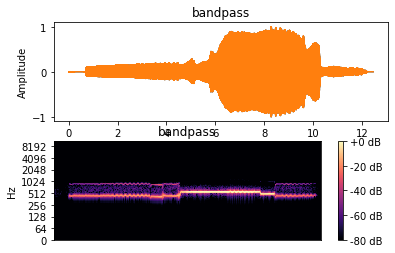

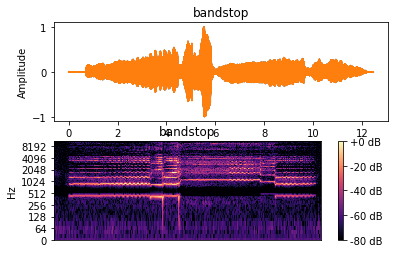

In [25]:
allFilters(sig,sr,600,200,4,winSize,specType)

sig_lp, sig_hp, sig_bp, sig_bs=allFilters(sig,sr,600,200,4,winSize,specType)

In [26]:
IPython.display.Audio(data=sig_lp, rate=sr) 

NameError: ignored

In [18]:
IPython.display.Audio(data=sig_hp, rate=sr) 

NameError: ignored

In [19]:
IPython.display.Audio(data=sig_bp, rate=sr) 

NameError: ignored

In [20]:
IPython.display.Audio(data=sig_bs, rate=sr) 

NameError: ignored